In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Laod dataset
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart.shape

(303, 14)

In [5]:
heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
X = heart.drop('target', axis=1)
Y = heart['target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clasifier = LogisticRegression(max_iter=1000)

In [19]:
clasifier.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

# Accuracy Score

In [20]:
X_train_prediction = clasifier.predict(X_train)
accuracy_of_training = accuracy_score(Y_train,X_train_prediction)
print('Accuracy on Train data', round(accuracy_of_training*100,2),'%')

Accuracy on Train data 85.12 %


In [22]:
X_test_prediction = clasifier.predict(X_test)
accuracy_of_test = accuracy_score(Y_test,X_test_prediction)
print('Accuracy on Train data', round(accuracy_of_test*100,2),'%')

Accuracy on Train data 88.52 %


# Confusion Matrix

In [26]:
cf_matrix = confusion_matrix(Y_test,X_test_prediction)
print(cf_matrix)


[[16  5]
 [ 2 38]]


<AxesSubplot:>

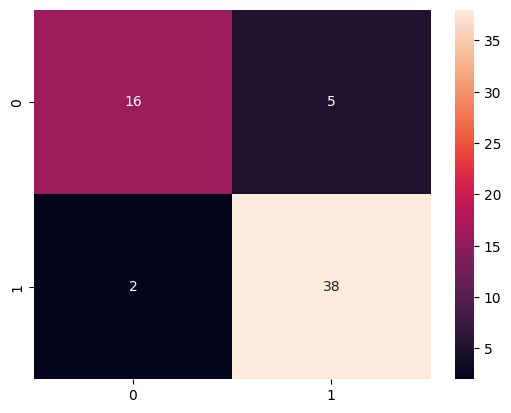

In [27]:
sns.heatmap(cf_matrix, annot=True)

In [32]:
one = heart[heart['target']== 1]

In [34]:
one.count()

age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
restecg     165
thalach     165
exang       165
oldpeak     165
slope       165
ca          165
thal        165
target      165
dtype: int64

In [35]:
zero = heart[heart['target']== 0]

In [37]:
zero.count()

age         138
sex         138
cp          138
trestbps    138
chol        138
fbs         138
restecg     138
thalach     138
exang       138
oldpeak     138
slope       138
ca          138
thal        138
target      138
dtype: int64